<h1><center>DSCI 100 Final Report (Group 28): Predicting European Video Game Sales</center></h1> 

## 1. Introduction
The video game industry began in the 1950s as simple games and simulations. Pixelated screens and limited sound have become a distant memory as video games are offering photorealistic graphics and pushing the frontier of stimulational reality. The video game sector is one of the largest in the entertainment industry. With the fast growing market, the gaming industry requires marketing data to help predict the sales for their new games. However, in recent years, the emergence of social networks and the developments of mobile games have greatly impacted traditional video games. Careful marketing planning is crucial when a new game is introduced to the market. Therefore, our research question is to predict the sales in the European market for a new action video game given North America and other regional sales. To achieve this, we used a dataset generated by scraping of vgchartz.com. It contains a list of video games with sales greater than 100,000 copies from 1980 to 2017. 
!!!1I_162

**Dataset:**
* Our dataset can be found at <a href="https://github.com/GregorUT/vgchartzScrape.git" target="_blank">this link</a>.
* Dataset is scraped from <a href="https://www.vgchartz.com" target="_blank">Vgchartz website</a>.

In [44]:
# * `Name`: name of the game
# * `Platform`: platform of the game release
# * `Year`: year that the game is released
# * `Genre`: genre of the game
# * `Publisher`: publisher of the game
# * `NA_Sales`: sales in North America (in millions)
# * `EU_Sales`: sales in Europe (in millions)
# * `JP_Sales`: sales in Japan (in millions)
# * `Other_Sales`: sales in other countries (in millions)
# * `Global_Sales`: total worldwide sales

In [45]:
#library needed for this project
library(tidyverse)
library(dplyr)
library(RColorBrewer)
library(tidyr)
library(tidymodels)
library(repr)
library(cowplot)
options(repr.matrix.max.rows = 6)

### 1.1 Load data into Jupyter notebook

In [46]:
raw_vgdata <- read_csv("https://raw.githubusercontent.com/kristennli/DSCI100_project/main/vgsales.csv")

Parsed with column specification:
cols(
  Rank = col_double(),
  Name = col_character(),
  Platform = col_character(),
  Year = col_character(),
  Genre = col_character(),
  Publisher = col_character(),
  NA_Sales = col_double(),
  EU_Sales = col_double(),
  JP_Sales = col_double(),
  Other_Sales = col_double(),
  Global_Sales = col_double()
)



### 1.2 Summary of data

In [47]:
summary(raw_vgdata)
#use glimpse to preview the dataset
glimpse(raw_vgdata)

      Rank           Name             Platform             Year          
 Min.   :    1   Length:16598       Length:16598       Length:16598      
 1st Qu.: 4151   Class :character   Class :character   Class :character  
 Median : 8300   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 8301                                                           
 3rd Qu.:12450                                                           
 Max.   :16600                                                           
    Genre            Publisher            NA_Sales          EU_Sales      
 Length:16598       Length:16598       Min.   : 0.0000   Min.   : 0.0000  
 Class :character   Class :character   1st Qu.: 0.0000   1st Qu.: 0.0000  
 Mode  :character   Mode  :character   Median : 0.0800   Median : 0.0200  
                                       Mean   : 0.2647   Mean   : 0.1467  
                                       3rd Qu.: 0.2400   3rd Qu.: 0.1100  
                                

Rows: 16,598
Columns: 11
$ Rank         <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1…
$ Name         <chr> "Wii Sports", "Super Mario Bros.", "Mario Kart Wii", "Wi…
$ Platform     <chr> "Wii", "NES", "Wii", "Wii", "GB", "GB", "DS", "Wii", "Wi…
$ Year         <chr> "2006", "1985", "2008", "2009", "1996", "1989", "2006", …
$ Genre        <chr> "Sports", "Platform", "Racing", "Sports", "Role-Playing"…
$ Publisher    <chr> "Nintendo", "Nintendo", "Nintendo", "Nintendo", "Nintend…
$ NA_Sales     <dbl> 41.49, 29.08, 15.85, 15.75, 11.27, 23.20, 11.38, 14.03, …
$ EU_Sales     <dbl> 29.02, 3.58, 12.88, 11.01, 8.89, 2.26, 9.23, 9.20, 7.06,…
$ JP_Sales     <dbl> 3.77, 6.81, 3.79, 3.28, 10.22, 4.22, 6.50, 2.93, 4.70, 0…
$ Other_Sales  <dbl> 8.46, 0.77, 3.31, 2.96, 1.00, 0.58, 2.90, 2.85, 2.26, 0.…
$ Global_Sales <dbl> 82.74, 40.24, 35.82, 33.00, 31.37, 30.26, 30.01, 29.02, …


### 1.3 Removal of Missing Data

Dataset is in tidy format, therefore, no additional cleaning and wrangling are necessary. However, missing data is removed by using `omit.na` function assuming they are missing at random. Moreover, we focused on games published prior to 2017 since there are incomplete data from 2017 onward. (!!!1.3_46)

In [48]:
vg <- na.omit(raw_vgdata) %>%
      filter(Year<2017) 

head(vg)

#dataframe filtered for action games only
vga <- na.omit(raw_vgdata) %>%
      filter(Year<2017) %>%
        filter(Genre == "Action")

head(vga)

Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
18,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
24,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
25,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
39,Grand Theft Auto III,PS2,2001,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
45,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98


### 1.4 Split Training and Testing Tests
We use the `initial_split` function to create the training and testing sets by specifying that `prop = 0.75` so that 75% of the original data set ends up in the training set. We set the strata argument to the numerical response variable (`EU_Sales`). These ensure that the the training model will have sufficient and appropriate number of observations to optimize the model. (!!!1.4_62)

In [49]:
set.seed(9999) 
vg_split <- initial_split(vga, prop = 0.75, strata = EU_Sales)  
vg_train <- training(vg_split)   
vg_test <- testing(vg_split)

## 2. Methods & Results

### 2.1 Exploratory Data Visualization

We first want to find out how game genre impact the past global sales. We can use group_by and summarize to find the amount of games under each genre and we see that action game is the most frequently sold gaming genre globally. (!!!43)

`summarise()` ungrouping output (override with `.groups` argument)



Genre,n
<chr>,<int>
Action,3252
Sports,2304
Misc,1710
⋮,⋮
Fighting,836
Strategy,671
Puzzle,571


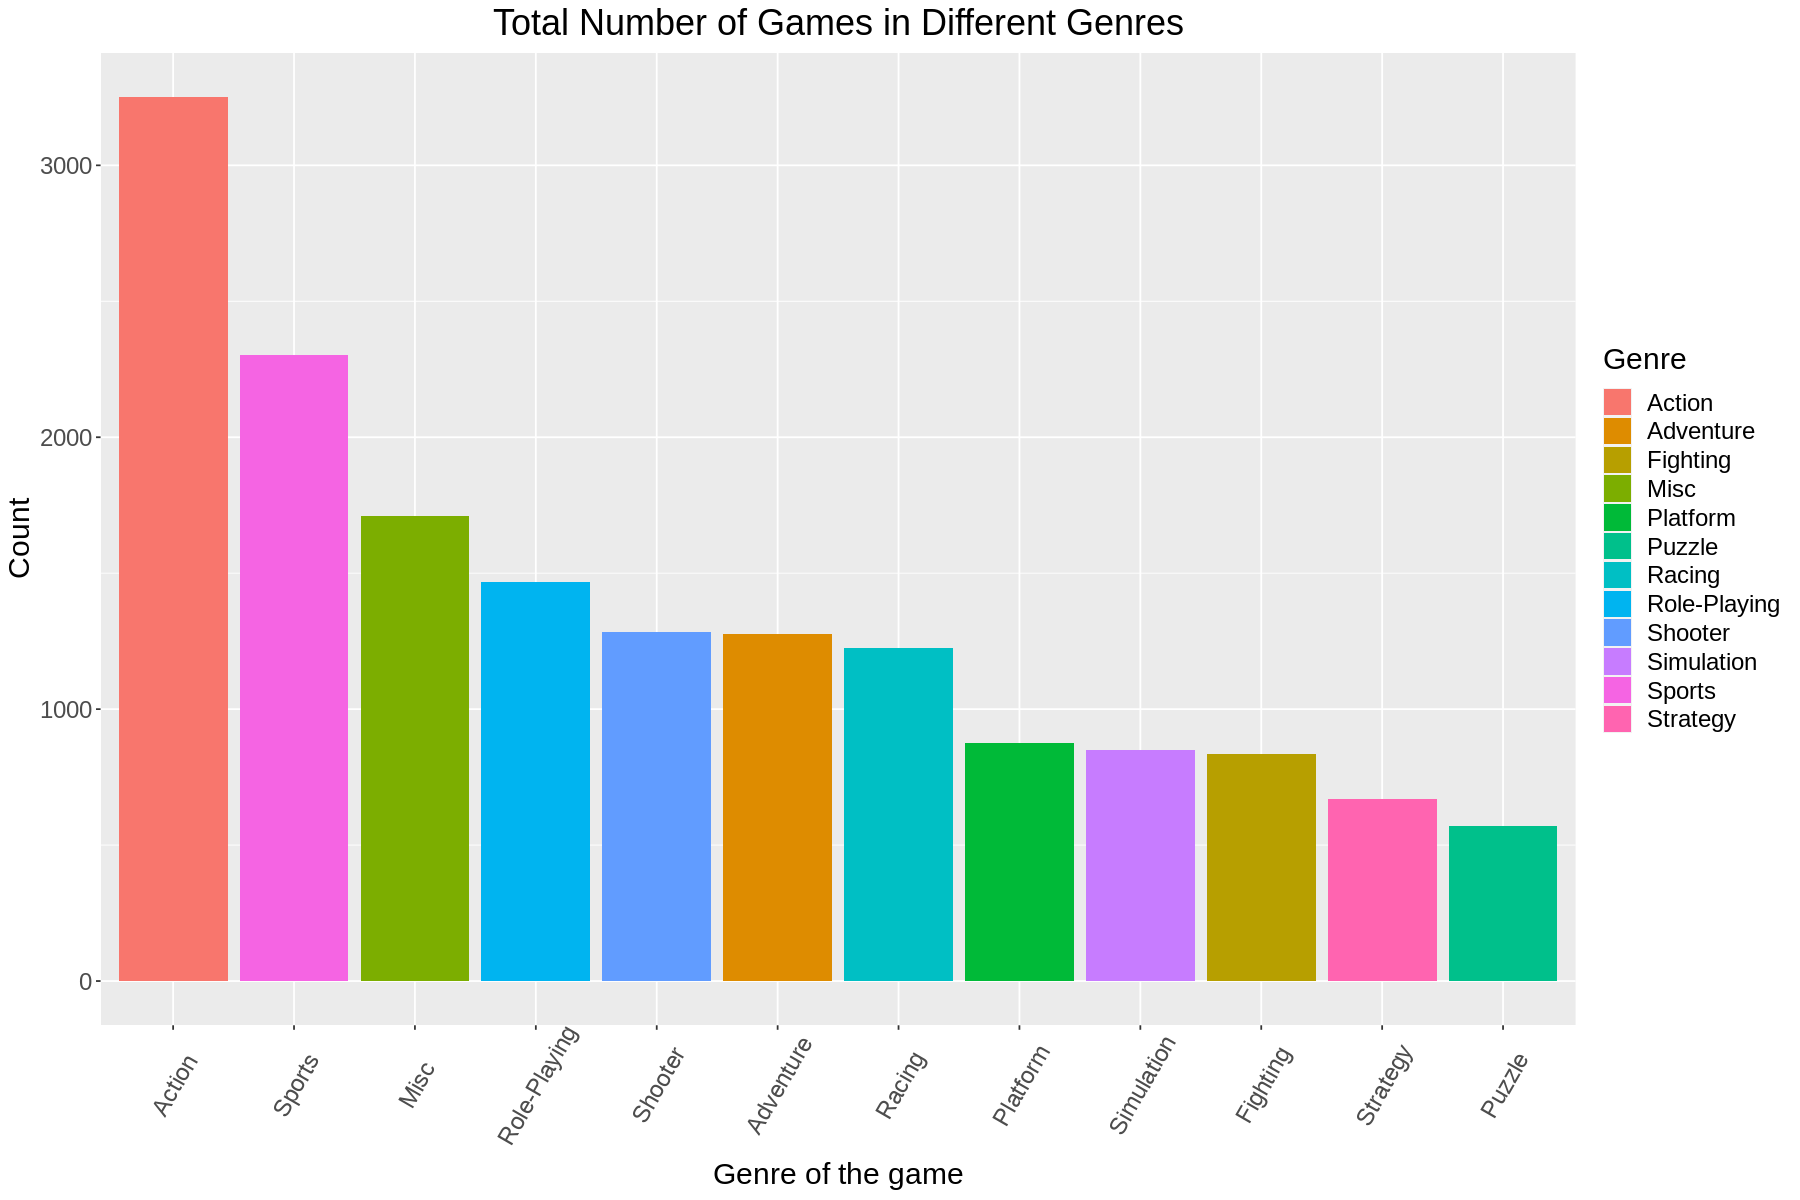

In [50]:
vg_genre <- vg %>%
  group_by(Genre) %>%
  summarise(n=n())%>%
  arrange(desc(n))

vg_genre

#Figure 1
#Visualization on the number of games in each genre
options(repr.plot.width = 15, repr.plot.height = 10)
vg_genre_plot <- vg_genre%>%
  ggplot(aes(x = reorder(Genre, -n), y = n, fill = Genre))+
  geom_bar(stat = 'identity')+
  labs(x = "Genre of the game",
       y = "Count", 
       fill = "Genre",
       title = "Total Number of Games in Different Genres")+
  scale_color_brewer(palette = "Set3")+
  theme(axis.text.x = element_text(angle = 60, vjust = 0.6, hjust=0.5), 
        text = element_text(size = 18))+
  theme(plot.title = element_text(hjust = 0.5))

vg_genre_plot

<span style="color:gray">Figure 1. Total number of games sold for the top 7 genres</span>

We then look at how customers' preference in selecting games changes over the years and we plot the total amount of global sales of the top 7 gaming genres. (!!!29)

`summarise()` regrouping output by 'Year' (override with `.groups` argument)



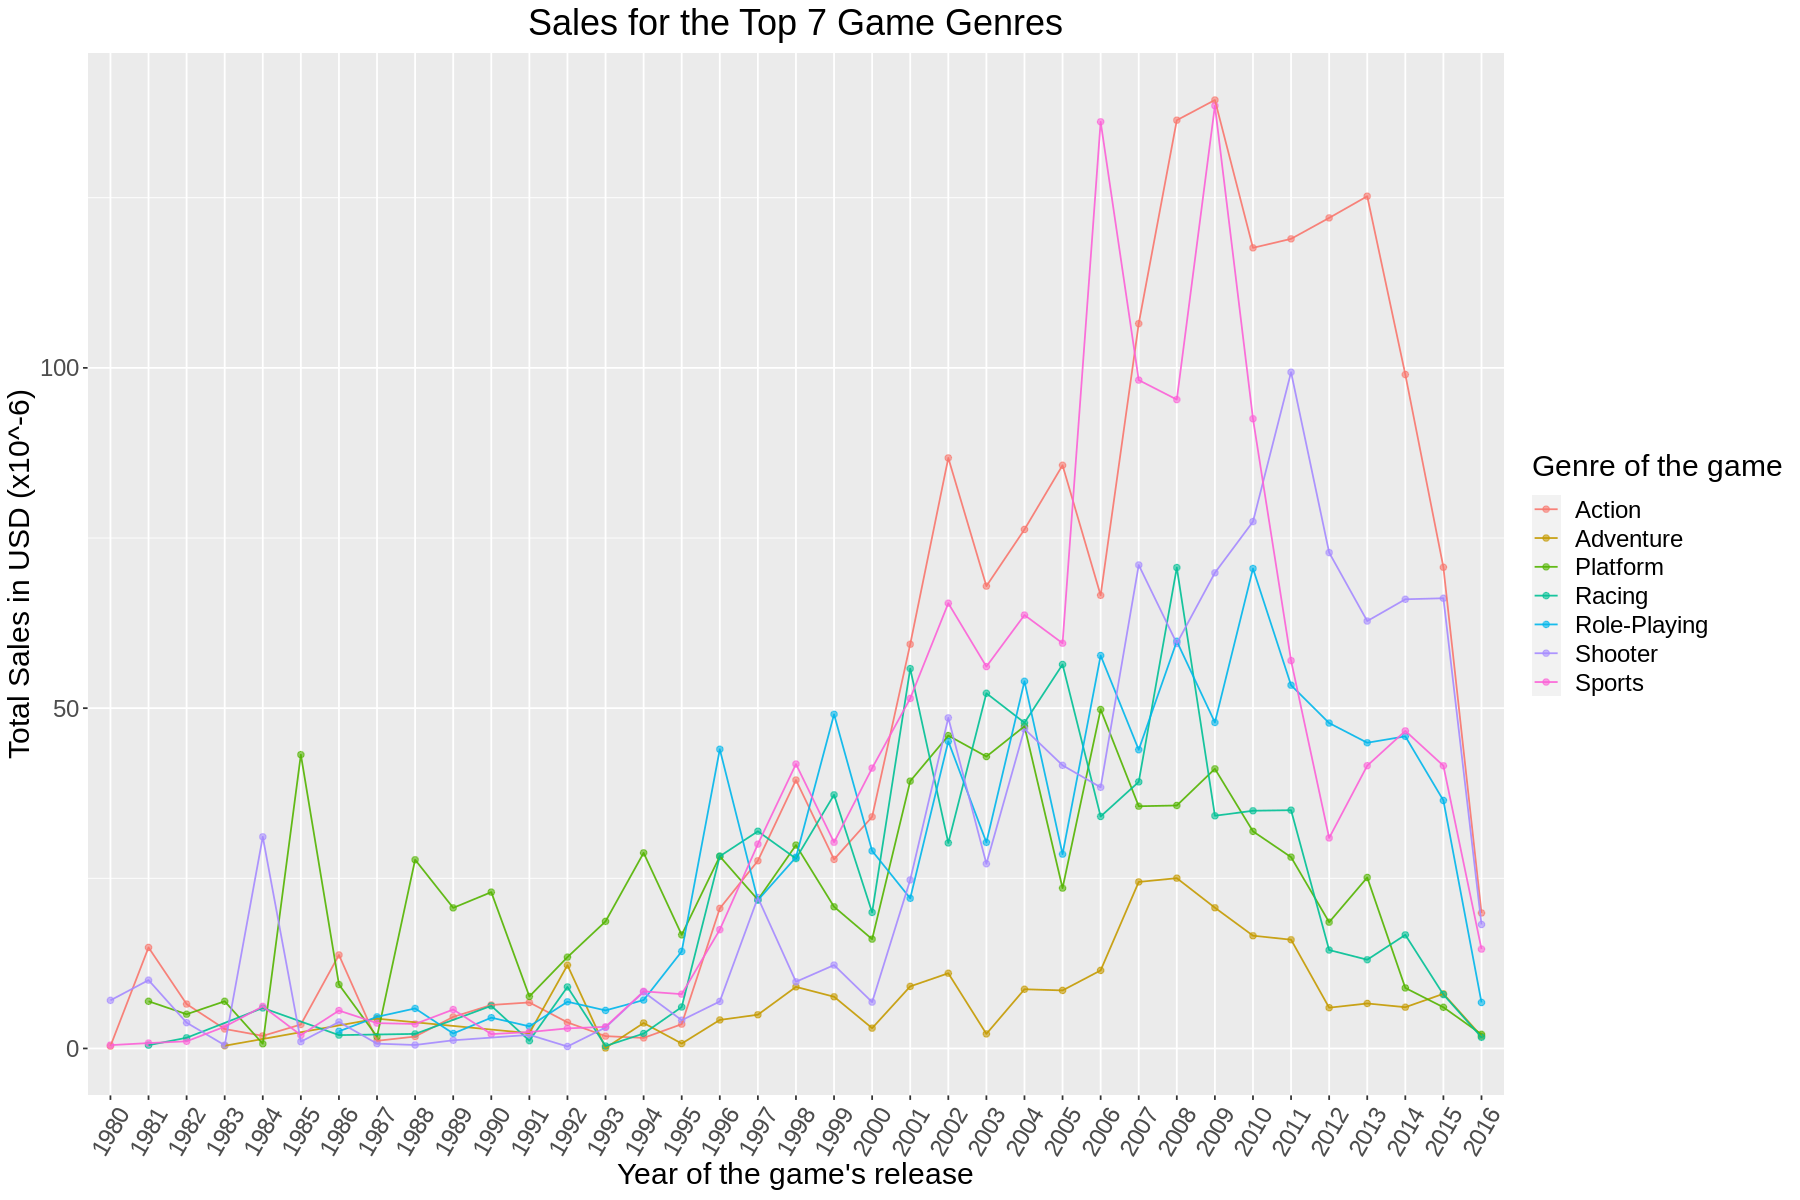

In [51]:
#summarize the different game genres' global sales
genre_gbsales <- vg %>%
  filter(Genre %in% c("Action","Sports","Role-Playing","Shooter",
                      "Adventure","Racing", "Platform"))%>%
    group_by(Year,Genre)%>%
    summarize(total_sales = sum(Global_Sales))

#Figure 2
#plot top 7 genres' global sales vs year of the game release
#only 7 out of 12 genres were selected for better visualization
options(repr.plot.width = 15, repr.plot.height = 10)
genre_gbsales_plot <- genre_gbsales %>%
  ggplot(aes(x = Year, y = total_sales, colour = Genre, group = Genre))+
  geom_point(alpha = 0.6)+
  geom_line(alpha = 0.9)+
    labs(x = "Year of the game's release",
         y = "Total Sales in USD (x10^-6)", 
         colour = "Genre of the game",
         title = "Sales for the Top 7 Game Genres")+
    theme(axis.text.x = element_text(angle = 60, vjust = 0.5, hjust=0.5), 
          text = element_text(size = 18))+
    theme(plot.title = element_text(hjust = 0.5))

genre_gbsales_plot

<span style="color:gray">Figure 2. Global sales for the top 7 genres</span>

Based on *Figure 1* and *Figure 2*, we observed that the top 3 popular gaming genres within the last 10 years are action, sports and shooter. (!!!26)

Based on the popularity shown in *Figure 2*, we decided to focus only on action games for further analysis. Factors like game genre can greatly affect the sales as observed from *Figure 2*. For instance, the total sales for action games are 5 times more than that of the platform games. We then use `nrow()` function to ensure that there are enough observations remaining in our narrowed dataframe. There are a total of 3252 observations which provide a sufficient size of data set for further analysis. !!!86

In [52]:
# count the number of games in each genre in the dataset
vg_genre_nrow <- vg %>%
    filter(Genre %in% c("Action")) %>%
    nrow()

vg_genre_nrow

[1] 3252

### 2.2 Correlation Matrix 

We then use `as.matrix()` to explore the correlation among each numerical variable in the training dataframe. !!!17

In [53]:
#correlation analysis, rounding the Matrics values to 2 decimal places
vg_cor<- vg_train %>% 
  select(-(Rank:Publisher))

sales_cor <- round(cor(vg_cor),2)%>%
  as.matrix()

sales_cor 

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
NA_Sales,1.00,0.79,0.31,0.66,0.95
EU_Sales,0.79,1.00,0.28,0.52,0.89
JP_Sales,0.31,0.28,1.00,0.18,0.43
Other_Sales,0.66,0.52,0.18,1.00,0.75
Global_Sales,0.95,0.89,0.43,0.75,1.00


<span style="color:gray">Table 1. Correlation Matrix for action game only dateset.

According to *Table 1*, `EU_Sales` has higher correlation values for `NA_Sales` and `Other_Sales`, 0.79 and 0.52 respectively. The correlation value between `Global_Sales` and `EU_Sales` is 0.89. However, we know that `Global_Sales` is the sum of the 4 different regional sales, so naturally the correlation value will be higher because `EU_Sales` is included in the `Global_Sales`, thus, we chose to omit the `Global_Sales` for further anlaysis.

<br> We will only consider `NA_Sales` and `Other_Sales` as potential predictors for `EU_Sales`. We know that increasing the number of predictors does not necessarily improve the accuracy of models. We will explore 2 cases: choosing `NA_Sales` as the only predictor or combining `NA_Sales` and `Other_Sales`. 

<br> Our research quesition is to build a regression model to predict European sales for action games. We are dealing with only numerical variables, so we can do a comparative study on two different regression models - K-nearest Neighbour (KNN) and linear regression. We will then evaluate our model performance using root mean squared error (RMSE).!!!168

### 2.3 Linear Regression

#### 2.3.1 Case 1: One Predictor - NA_Sales

According to *Figure 2*, the best selling game genre is action. A way to demonstrate the marketing value of our regression model and we assume the gaming company will choose the best selling game genre as their next product. Therefore, we will only focus on action games within this video game dataset. 

We use a `linear_reg` model specification with the `lm` engine and create a recipe with one predictor `NA_Sales` and fit the training set `vg_train` to our linear regression model. No standardization is performed on the predictor as it does not affect the fit in linear regression. !!!98

In [54]:
#create model specification and recipe
lm_spec <- linear_reg() %>%
  set_engine("lm") %>%
  set_mode("regression")

#CASE1->one predictor: NA_Sales
lm_recipe <- recipe(EU_Sales ~ NA_Sales, data = vg_train)

#fit simple linear regression model
lm_fit <- workflow() %>%
  add_recipe(lm_recipe) %>%
  add_model(lm_spec) %>%
  fit(data = vg_train)
lm_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)     NA_Sales  
    0.01092      0.55975  


`geom_smooth()` using formula 'y ~ x'



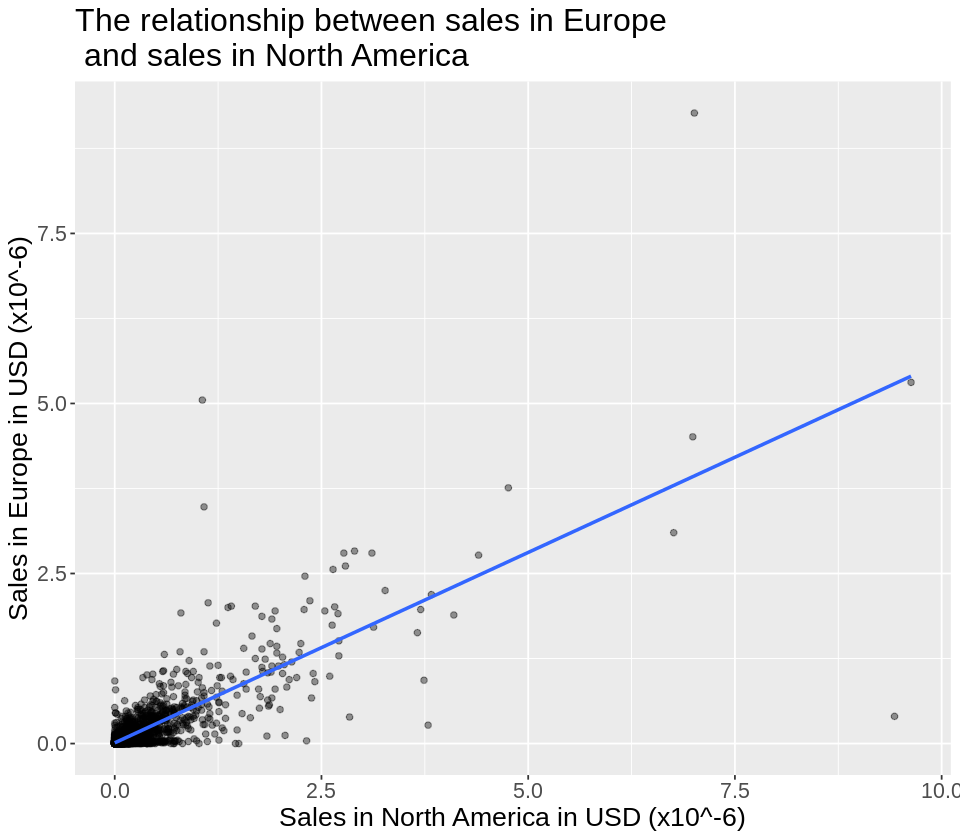

In [55]:
#simple linear regression model visualization
options(repr.plot.width = 8, repr.plot.height = 7)

lm_predictions <- vg_train%>%
    ggplot(aes(x = NA_Sales, y = EU_Sales))+
    geom_point(alpha=0.4)+
    labs(x = "Sales in North America in USD (x10^-6)",
        y= "Sales in Europe in USD (x10^-6)")+
    ggtitle("The relationship between sales in Europe \n and sales in North America")+
    theme(text = element_text(size = 16))+
    geom_smooth(method = "lm", se = FALSE) 
lm_predictions

<span style="color:gray">Figure 3. The relationship between sales in Europe and sales in North America</span>

In *Figure 3*, we can see that there are only a few observations above 2.5 million in both `EU_Sales` and `NA_Sales`. Therefore, we decided to graph the data excluding numbers above 2.5 million in order to better visualize the correlation trend (*Figure 4*). !!!43


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 30 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 30 rows containing missing values (geom_point).”


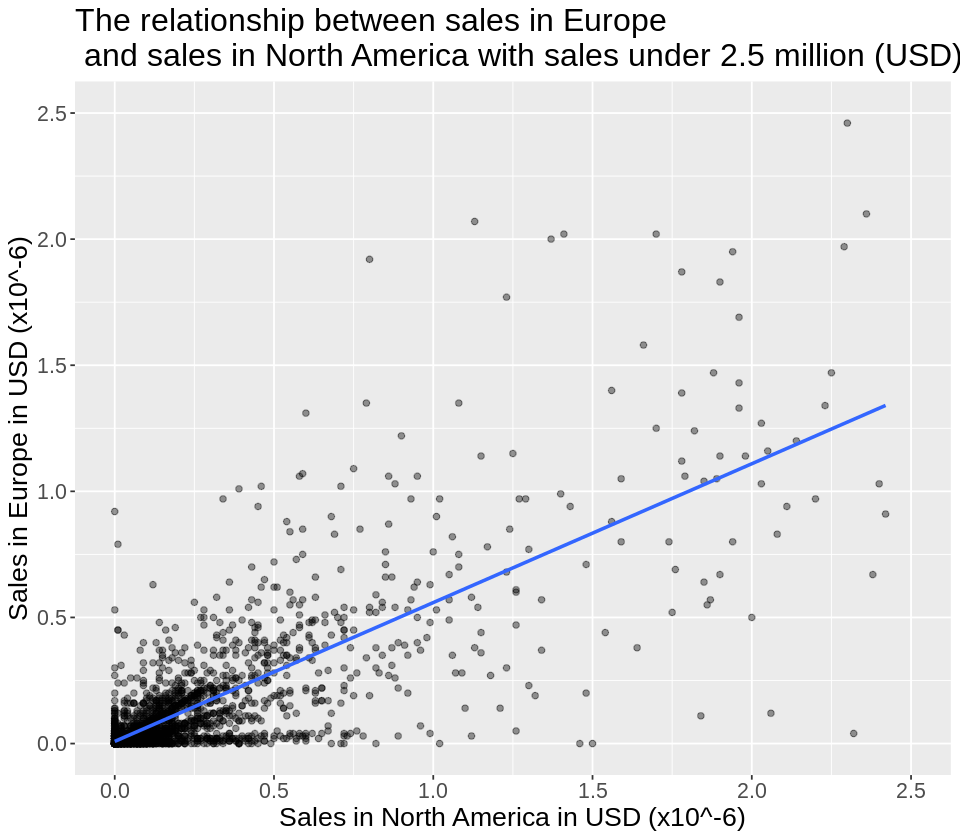

In [56]:
#simple linear regression model visualization
options(repr.plot.width = 8, repr.plot.height = 7)

lm_predictions <- vg_train%>%
    ggplot(aes(x = NA_Sales, y = EU_Sales))+
    geom_point(alpha=0.4)+
    labs(x = "Sales in North America in USD (x10^-6)",
        y= "Sales in Europe in USD (x10^-6)")+
    ggtitle("The relationship between sales in Europe \n and sales in North America with sales under 2.5 million (USD)")+
    theme(text = element_text(size = 16))+
    geom_smooth(method = "lm", se = FALSE) +
    xlim(c(0, 2.5))+
    ylim(c(0, 2.5))
lm_predictions

<span style="color:gray">Figure 4. The relationship between sales in Europe and sales in North America with sales under 5 million</span>

The sale distribution for different regions is then rendered to visualize the skewed distribution. In *Figure 5*, the distributions for both dataframes are skewed, indicating by the asymmetrical histograms. This skewness is expected as the sale values can vary due to many factors: the popularity of the game, the perception of the customers. The more popular the game, the greater the sale value we will expect. The whole dataset consists of 16600 observations, ranking from the highest sales to the lowest. Therefore, the skewed distribution is due to the majority of the games having a low sale value.

As shown in *Figure 4*, majority of the observations are in the 0 to 0.5 million sales range, therefore, we decide to render the sale distribution for all four regions in a histogram. In *Figure 5*, the right skewed distribution is true to all four regions. !!!145

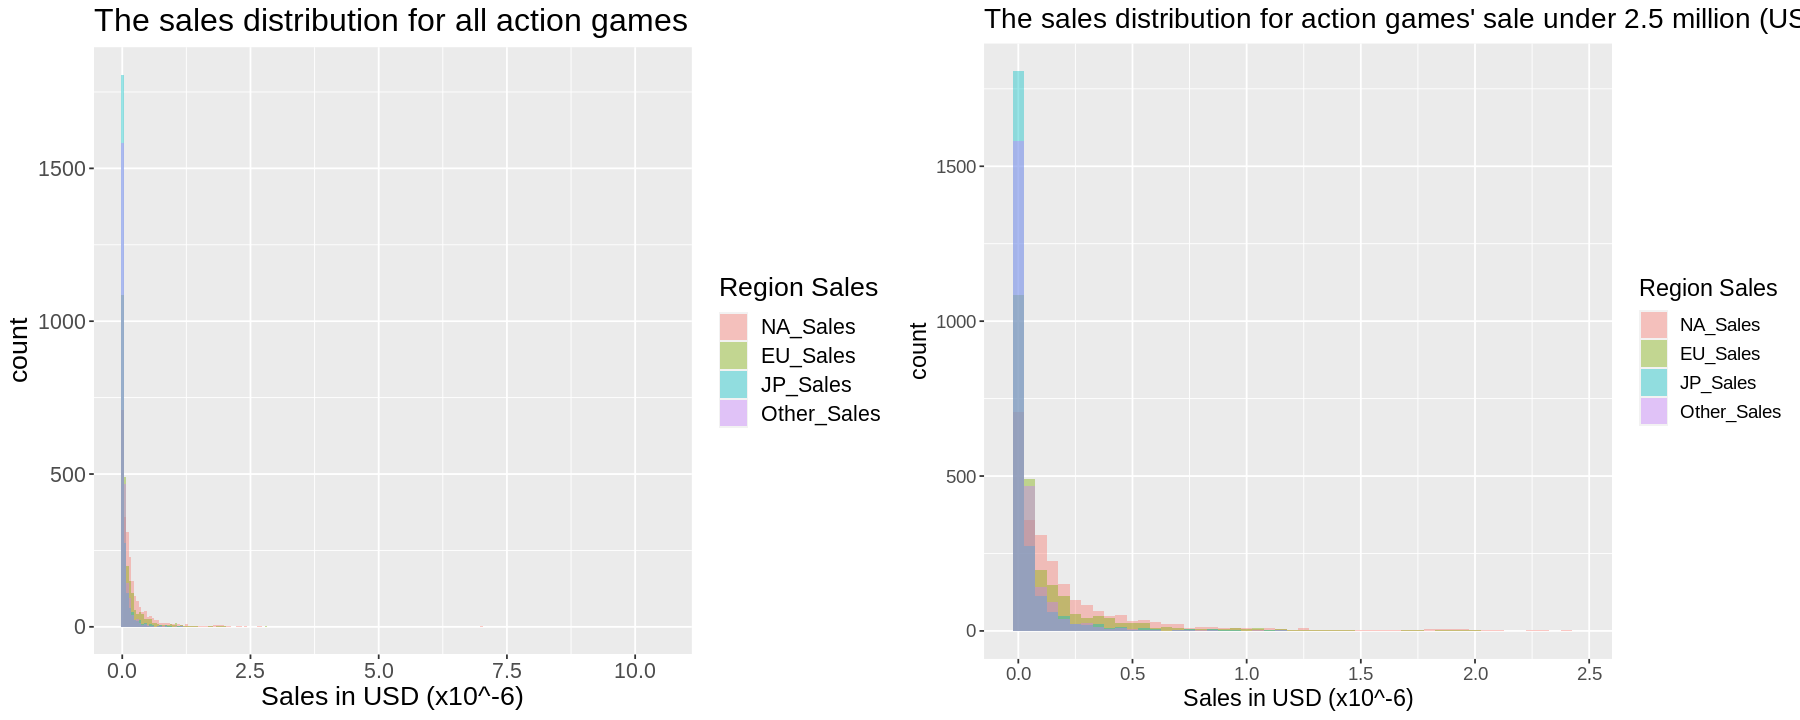

In [57]:
#visualization on sales distribution, color separation with different regions

vg_train_longer <- vg_train %>%
    pivot_longer(cols = NA_Sales:Other_Sales,
                  names_to = "region",
                  values_to = "sales") %>%
    mutate(region = as_factor(region)) 

#filter sales less than 2.5 million
vg_train_2dot5m <- vg_train_longer %>%
    filter(sales <=2.5)


#sales distribution for sales under 2.5 million
options(repr.plot.width = 15, repr.plot.height = 10)
vg_pop_dist_plot_2dot5m <- vg_train_2dot5m%>%
    ggplot(aes(x = sales, fill = as_factor(region)))+
    geom_histogram(position = "identity", binwidth=0.05, alpha = 0.4)+
    scale_color_brewer(palette = "Set1")+
    labs(x = "Sales in USD (x10^-6)", fill = "Region Sales")+
    ggtitle("The sales distribution for action games' sale under 2.5 million (USD)")+
    theme(text = element_text(size = 14))

#sales distribution for all sales
options(repr.plot.width = 10, repr.plot.height = 10)
vg_pop_dist_plot_all <- vg_train_longer%>%
    ggplot(aes(x = sales, fill = as_factor(region)))+
    geom_histogram(position = "identity", binwidth=0.05, alpha = 0.4)+
    scale_color_brewer(palette = "Set1")+
    labs(x = "Sales in USD (x10^-6)",fill = "Region Sales")+
    ggtitle("The sales distribution for all action games")+
    theme(text = element_text(size = 16))


#compare the sale distribution with all action games vs action games under 2.5 million sales 
options(repr.plot.width = 15, repr.plot.height = 6)
plot_grid(vg_pop_dist_plot_all, vg_pop_dist_plot_2dot5m)

<span style="color:gray">Figure 5. The sales distribution comparison between all action games and action games with sales under 2.5 million. Left: the sale distribution for all action games; Right: the sale distribution for action games which sold under 2.5 million.</span>

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Warning message:
“Removed 10 rows containing missing values (geom_bar).”
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Warning message:
“Removed 10 rows containing missing values (geom_bar).”


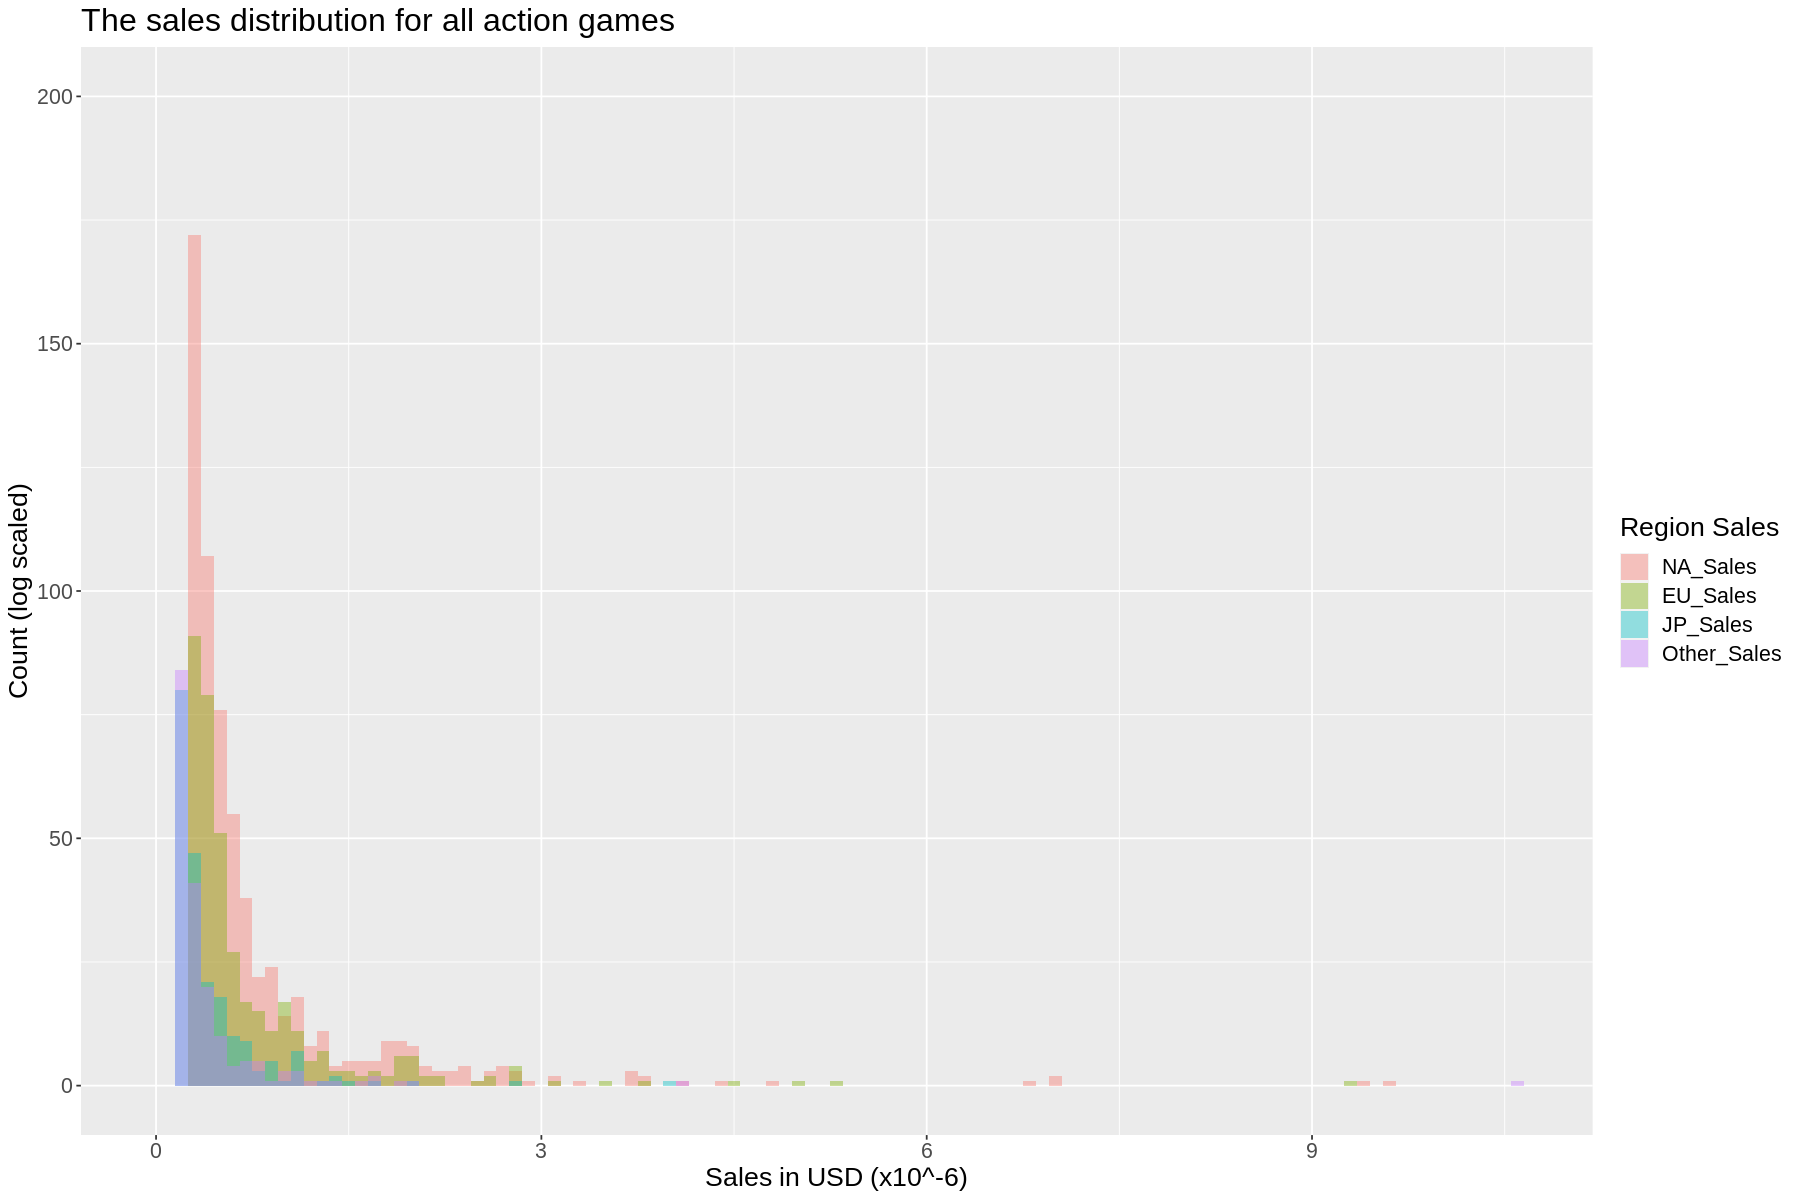

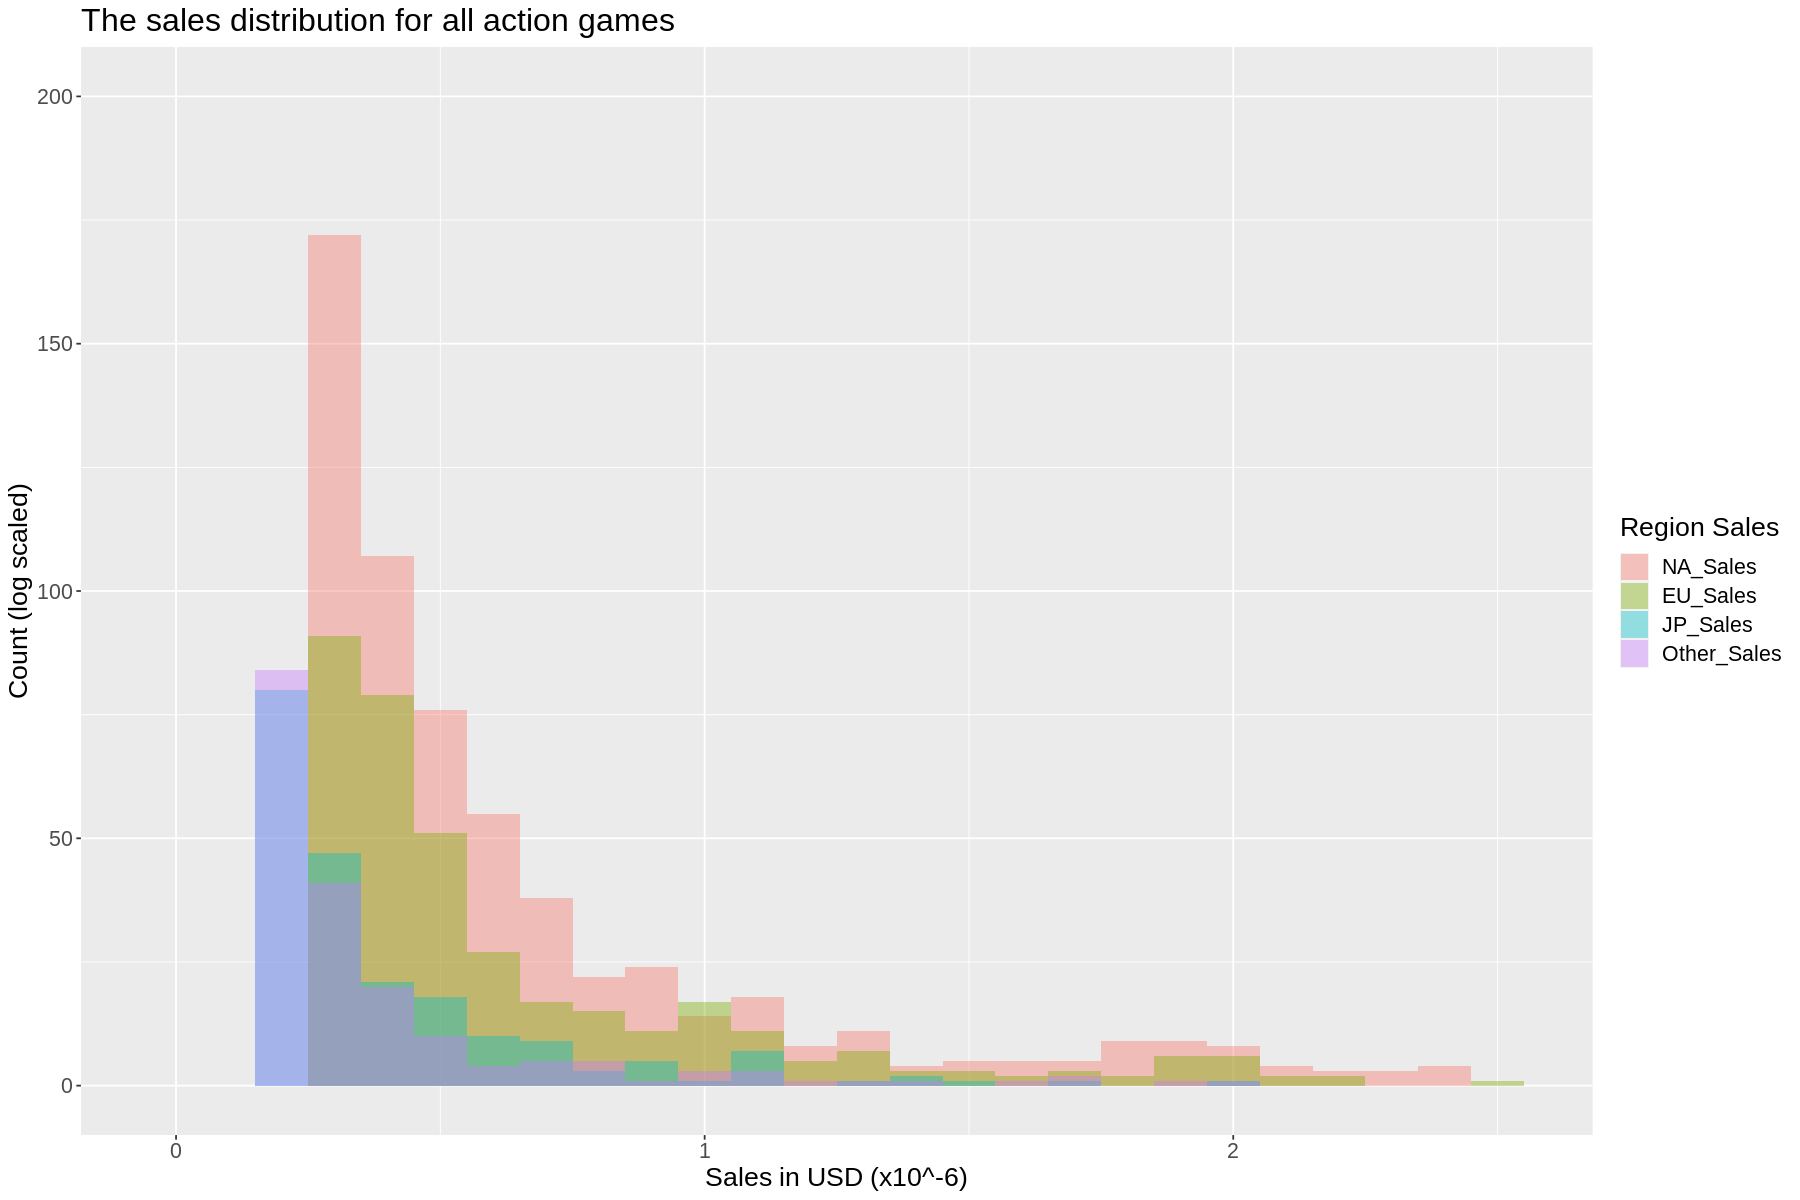

In [58]:
#visualization on sales distribution, color separation with different regions, put count(y-axis) in log
#non-finite values are caused by log scale of values being 0, or very close to 0
options(repr.plot.width = 15, repr.plot.height = 10)
vg_pop_dist_plot_log <- vg_train_longer%>%
    ggplot(aes(x = sales, fill = as_factor(region)))+
    geom_histogram(position = "identity", binwidth=0.1, alpha = 0.4)+
    scale_color_brewer(palette = "Set1")+
    scale_y_continuous(trans = "log")+
    ylim(0,200)+
    labs(x = "Sales in USD (x10^-6)",y= "Count (log scaled)",fill = "Region Sales")+
    ggtitle("The sales distribution for all action games")+
    theme(text = element_text(size = 16))


vg_pop_dist_plot_log

options(repr.plot.width = 15, repr.plot.height = 10)
vg_pop_dist_plot_log_2dot5 <- vg_train_2dot5m%>%
    ggplot(aes(x = sales, fill = as_factor(region)))+
    geom_histogram(position = "identity", binwidth=0.1, alpha = 0.4)+
    scale_color_brewer(palette = "Set1")+
    scale_y_continuous(trans = "log")+
    ylim(0,200)+
    labs(x = "Sales in USD (x10^-6)",y= "Count (log scaled)",fill = "Region Sales")+
    ggtitle("The sales distribution for all action games")+
    theme(text = element_text(size = 16))


vg_pop_dist_plot_log_2dot5

<span style="color:gray">Figure 6. The sales distribution of all action games</span>

In *Figure 5*, we can see the observations are bining near the y axis. Therefore, we plot the sale distribution with y axis in log scale and zoom in on sales under 2.5 million in *Figure 6*. We can see majority of the observations are in the 0 to 1 million sales range. For future predictions using our regression model, we can be more confident with predictions for games generating lower sales rather than higher sales because the majority of our data represents games that generate less than 2.5 million in sales. !!!92

Finally we predict on the test data set to access how well our model for the one predictor does. We use `bind_cols` and `metrics` to assess the quality. !!!28

In [59]:
#predict on the test data set to assess how well our model does
lm_test_results_onepredictor <- lm_fit %>%
  predict(vg_test) %>%
  bind_cols(vg_test) %>%
  metrics(truth = EU_Sales, estimate = .pred)

#### 2.3.2 Case 2: 2 predictors - NA_Sales and Other_Sales

Similar to the one predictor model, we changed one predictor to two predictors (`NA_Sales` and `Other_Sales`) to build the model to predict the `EU_Sales` in our training dataset. Finally, we calculate the RMSPE on the test data set to assess the quality of this model.!!!45

In [60]:
#CASE2->two predictors: NA_Sales and Other_Sales
lm_recipe_2 <- recipe(EU_Sales ~ NA_Sales + Other_Sales, data = vg_train)

#fit linear regression model
lm_fit_2 <- workflow() %>%
  add_recipe(lm_recipe_2) %>%
  add_model(lm_spec) %>%
  fit(data = vg_train)

#predict on the test data set to assess how well our model does
lm_test_results_twopredictors <- lm_fit_2 %>%
  predict(vg_test) %>%
  bind_cols(vg_test) %>%
  metrics(truth = EU_Sales, estimate = .pred)

In [61]:
lm_test_results_onepredictor_updated <- lm_test_results_onepredictor %>%
    mutate(predictor = c("NA_Sales","NA_Sales","NA_Sales")) 

lm_test_results_twopredictors_updated <- lm_test_results_twopredictors %>%
    mutate(predictor = c("NA_Sales, EU_Sales","NA_Sales, EU_Sales","NA_Sales, EU_Sales"))

lm_test_results_combined <- merge(lm_test_results_onepredictor_updated, lm_test_results_twopredictors_updated,all = TRUE)
lm_test_results_combined

.metric,.estimator,.estimate,predictor
<chr>,<chr>,<dbl>,<chr>
mae,standard,0.09096033,NA_Sales
mae,standard,0.09096246,"NA_Sales, EU_Sales"
rmse,standard,0.21792790,NA_Sales
rmse,standard,0.21793568,"NA_Sales, EU_Sales"
rsq,standard,0.71616362,"NA_Sales, EU_Sales"
rsq,standard,0.71619129,NA_Sales


<span style="color:gray">Table 2. Comparative RMSPE results for case 1 and 2 in linear regression models to access the quality of our two linear regression models.

In order to compare the two linear regression models with different selections on the predictors, we calculate the RMSPE for our test set using the two linear regreassion models. According to *Table 3*, the RMSE for `NA_Sales` only as the predictor (0.21793) is smaller compared to both `NA_Sales` and `Other_Sales` as predictors (0.21794). Therefore, we can conclude that selecting `NA_Sales` as the only predictor improve the accuracy of our model based on its smaller RMSE, however, the two RMSE results are marginally different. !!!85

### 2.4 K-Nearest Neighbour (KNN)

#### 2.4.1 Case 1: One Predictor - NA_Sales

!!!can we set another seed here?

In [62]:
#Create recipe for cross-validation
initial_game_recipe <- recipe(EU_Sales ~ NA_Sales, data = vga) %>%
                        step_scale(all_predictors()) %>% step_center(all_predictors())

#Create a model specification
initial_game_spec <- nearest_neighbor(weight_fun = "rectangular", neighbors = tune()) %>%
                        set_engine("kknn") %>% set_mode("regression")

#Create 5-fold cross-validation
vg_vfold <- vfold_cv(vg_train, v = 5, strata = EU_Sales)

#Create a workflow
vg_workflow <- workflow() %>%
                add_recipe(initial_game_recipe) %>%
                add_model(initial_game_spec)

vg_workflow

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [63]:
#Create a tibble
vg_tibble <- tibble(neighbors = seq(from = 1, to = 50))

head(vg_tibble)

neighbors
<int>
1
2
3
4
5
6


In [64]:
#Determine the best K value
vg_results <- vg_workflow %>%
                tune_grid(resamples = vg_vfold, grid = vg_tibble) %>%
                collect_metrics() %>%
                filter(.metric == "rmse")

vg_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,0.4573491,5,0.03278978,Model01
2,rmse,standard,0.3475020,5,0.03629863,Model02
3,rmse,standard,0.3263632,5,0.03427149,Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
48,rmse,standard,0.2680284,5,0.04972388,Model48
49,rmse,standard,0.2680744,5,0.05000317,Model49
50,rmse,standard,0.2687290,5,0.05028913,Model50


In [65]:
#Find the K that has the lower RMSE
vg_min_rmse <- vg_results %>%
                filter(mean == min(mean))

vg_min_rmse

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
22,rmse,standard,0.2617667,5,0.04410613,Model22


In [66]:
kmin <- vg_min_rmse %>%
        pull(neighbors)

kmin

[1] 22

In [67]:
#Create a new model with the optimal K value
new_game_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = kmin) %>%
                    set_engine("kknn") %>%
                    set_mode("regression")

new_game_spec

K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = kmin
  weight_func = rectangular

Computational engine: kknn 


First, we create a recipe and model specification for a KNN-regression model. Then we perform cross-validation to determine the best K-neighbor value to use. After creating a workflow, we look for a K-neighbor value that returns the lowest mean. In this case, we conclude that we will be using K-neighbor value of 22. !!!53

In [68]:
#the new model is fit to the data
new_game_workflow <- workflow() %>%
                    add_recipe(initial_game_recipe) %>%
                    add_model(new_game_spec) %>%
                    fit(data = vg_train)

new_game_workflow

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~kmin,     kernel = ~"rectangular")

Type of response variable: continuous
minimal mean absolute error: 0.1236976
Minimal mean squared error: 0.07513285
Best kernel: rectangular
Best k: 22

In [69]:
#Predictions are made on the test set to evaluate the effficacy of our model and to determine the RMSPE
vg_knn_regression <- new_game_workflow %>%
                        predict(vg_test) %>%
                        bind_cols(vg_test) %>%
                        metrics(truth = EU_Sales, estimate = .pred) %>%
                        filter(.metric == "rmse")

vg_knn_regression

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.2481428


After deciding on what K-neighbor value to use, we use the chosen K-value to re-establish model specification. Then we create a workflow and run metrics to determine the RMSPE on the test data. Here, we receive a RMSPE value of 0.248. !!!42

In [70]:
NA_min <- vg_train %>%
            summarize(NA_min = min(NA_Sales))

NA_max <- vg_train %>%
            summarize(NA_max = max(NA_Sales))

In [71]:
EU_preds <- tibble(NA_Sales = seq(from = 0, to = 42))
EU_preds <- new_game_workflow %>% predict(EU_preds) %>% bind_cols(EU_preds)
head(EU_preds)

.pred,NA_Sales
<dbl>,<int>
0.09045455,0
0.74272727,1
1.05954545,2
1.71363636,3
1.94590909,4
2.47272727,5


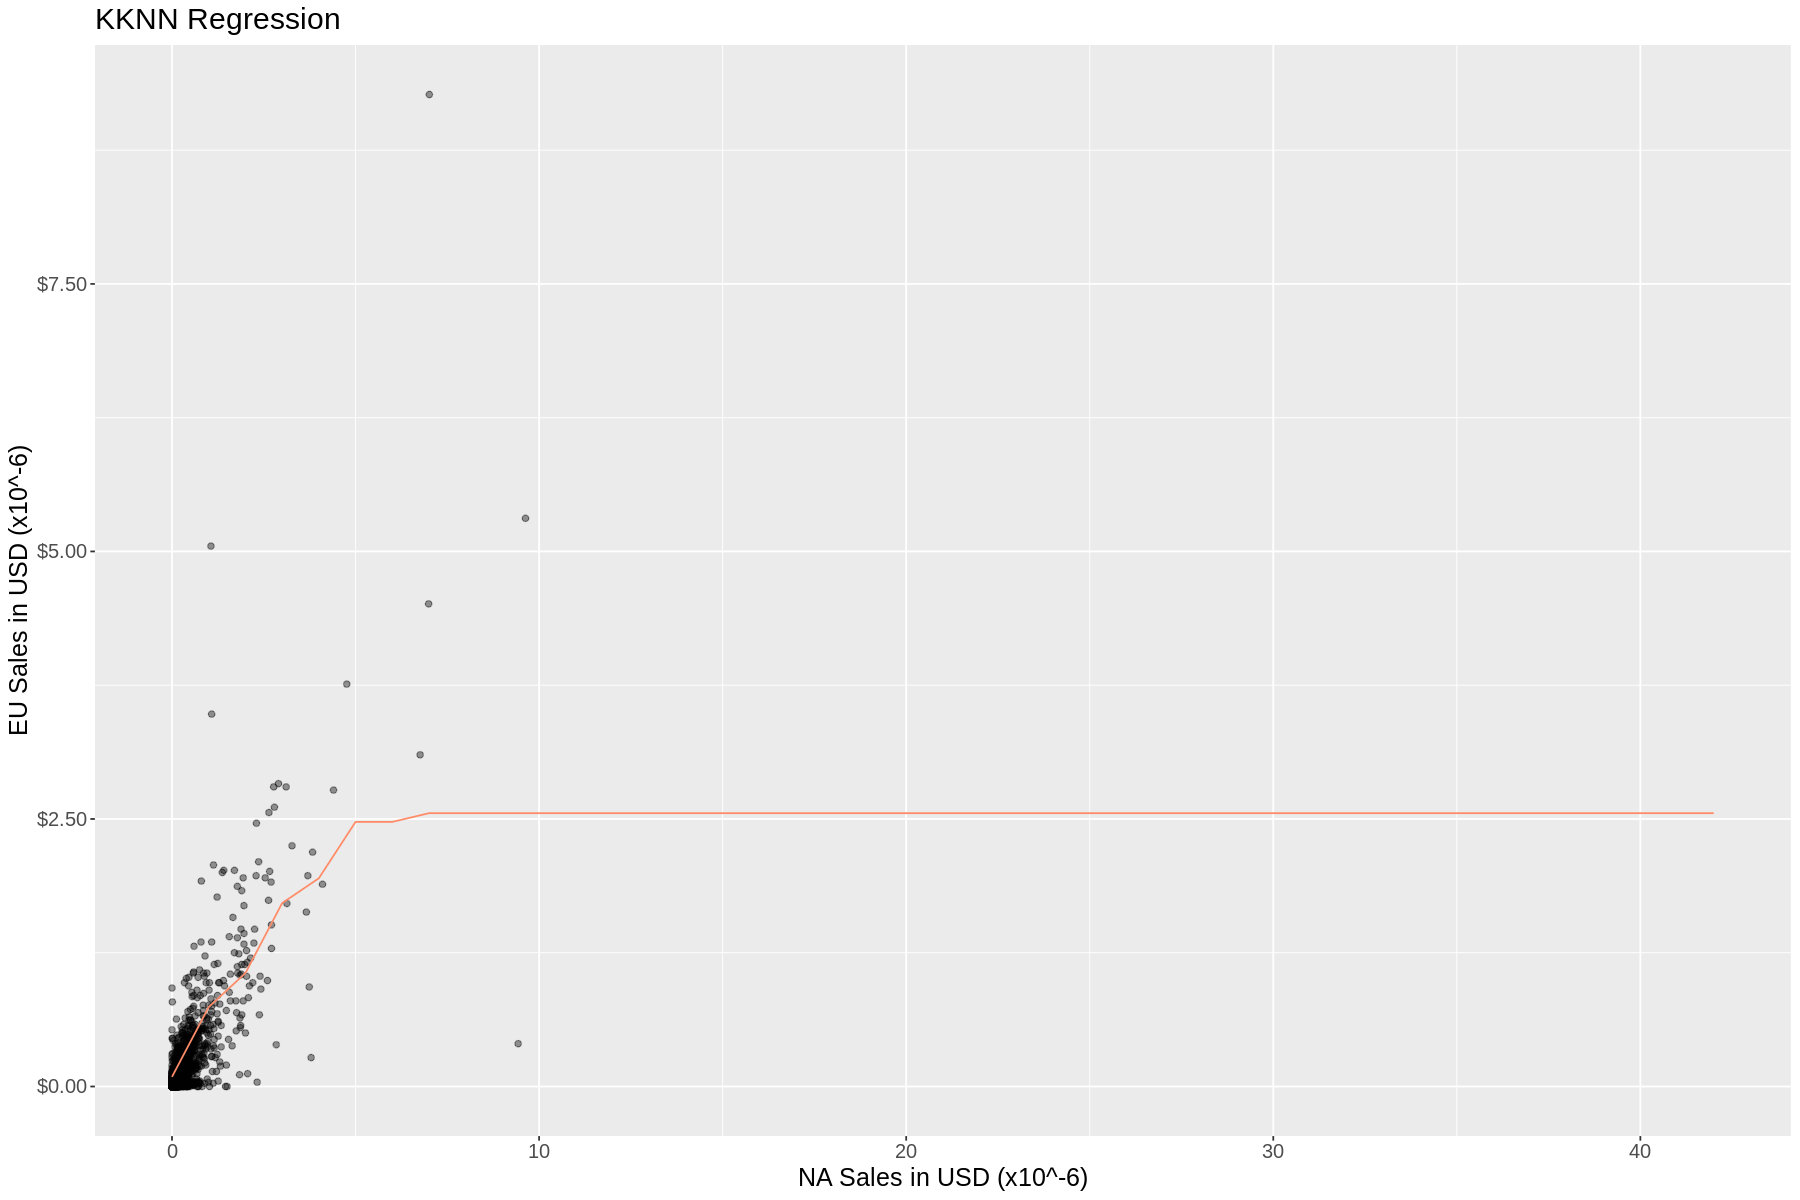

In [72]:
kknn_graph <- ggplot(vg_train, aes(x = NA_Sales, y = EU_Sales)) +
                geom_point(alpha = 0.4) +
                geom_line(data = EU_preds,
                         mapping = aes(x = NA_Sales, y = .pred),
                         color = "salmon1") +
                xlab("NA Sales in USD (x10^-6)") +
                ylab("EU Sales in USD (x10^-6)") +
                scale_y_continuous(label = dollar_format()) +
                ggtitle("KKNN Regression") +
                theme(text = element_text(size = 15))

kknn_graph

<center><span style="color:gray">Figure 7. Scatterplot to visualize regression between EU_Sales and Other_Sales </span></center>

In *Figure 7*, we visualize the overall trend of KNN_regression model, and observe that due to a presence of an outlier the scatter plot does not seem to suitably represent the shape of the regression model. Instead, we decide to reduce the range of `vg_train` dataset to get a clearer depiction of the model. 

After reducing the range of the observations from `NA_Sales` and `EU_Sales` variables, we obtain *Figure 8* (see below).   !!!71

In [73]:
#Remove outliers in X-variable
EU_preds_no_outlier <- tibble(NA_Sales = seq(from = 0, to = 10))
EU_preds_no_outlier <- new_game_workflow %>% predict(EU_preds_no_outlier) %>% bind_cols(EU_preds_no_outlier)

vg_train_no_outlier <- vg_train %>%
                filter(NA_Sales < 10) %>%
                filter(EU_Sales < 6)


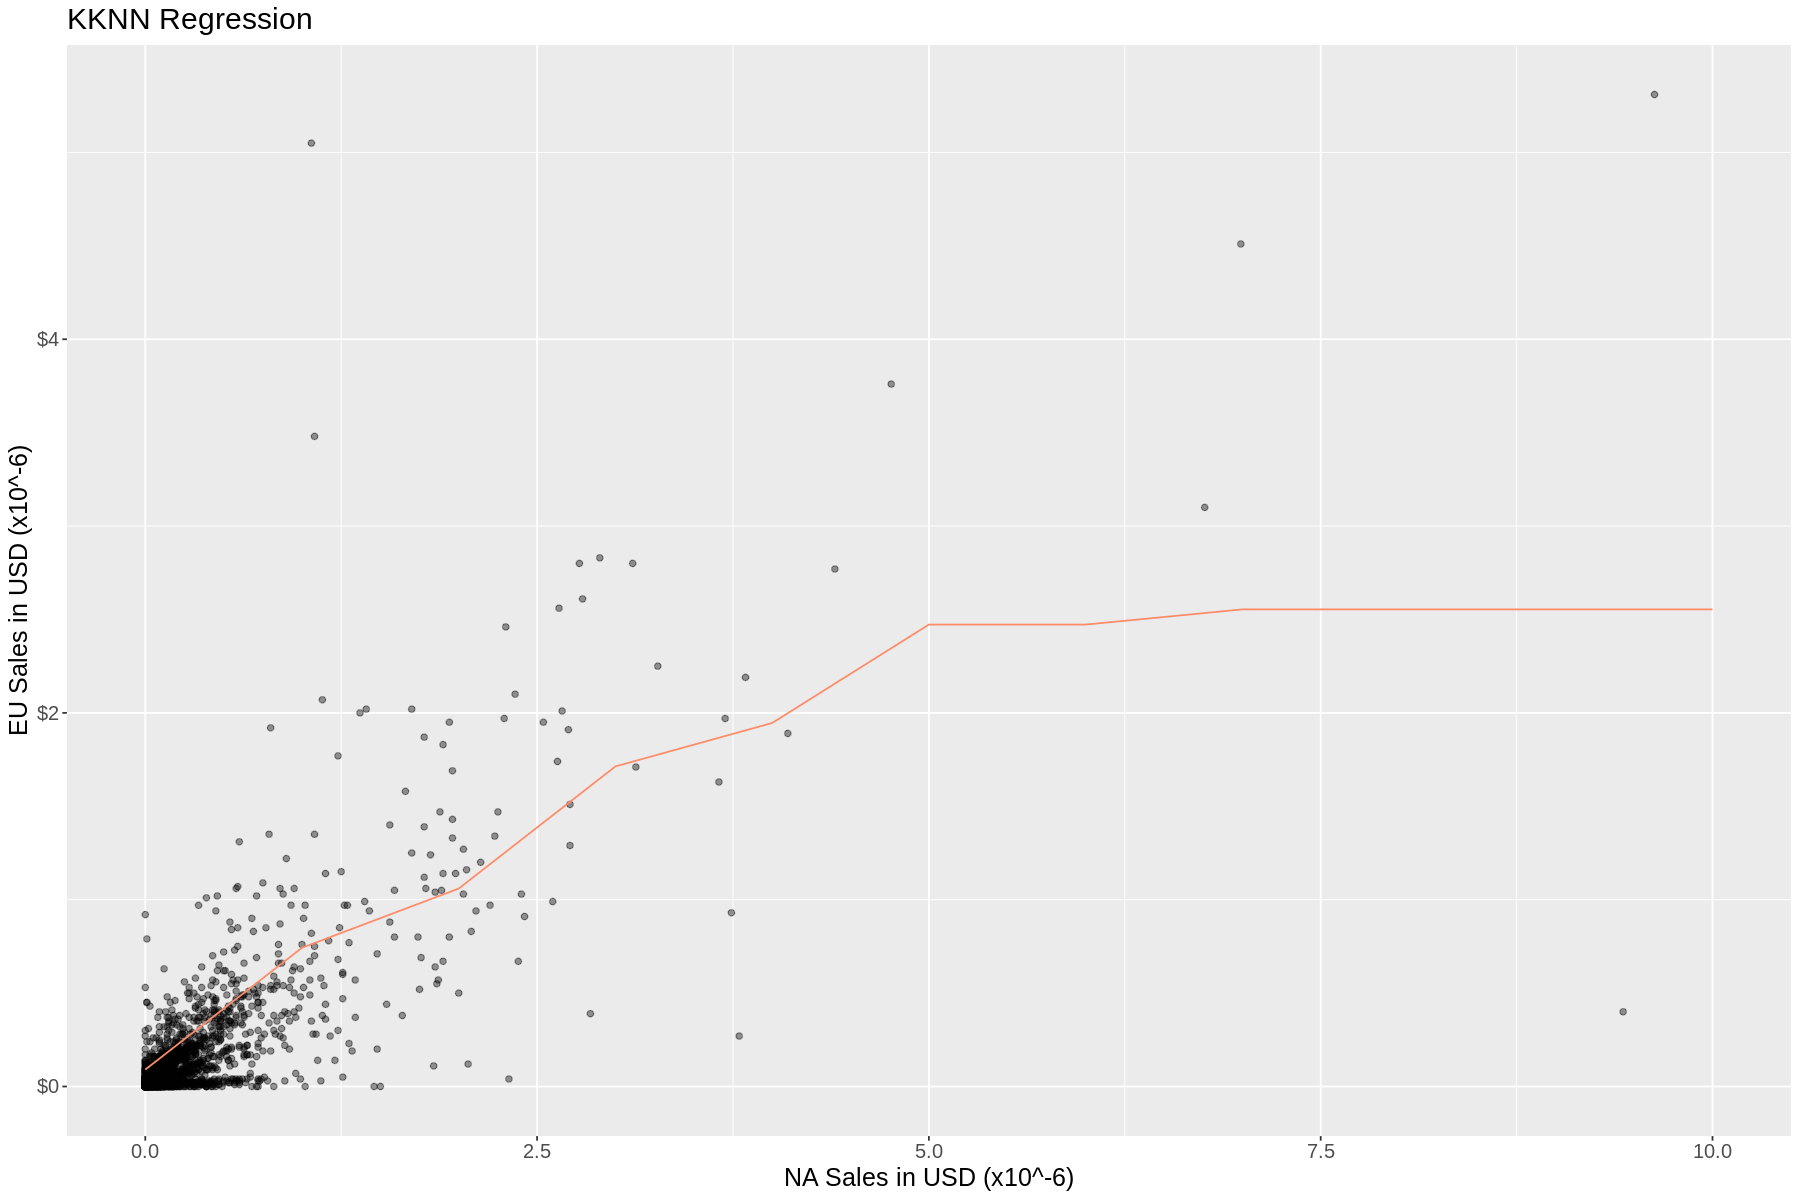

In [74]:
kknn_graph_no_outlier <- ggplot(vg_train_no_outlier, aes(x = NA_Sales, y = EU_Sales)) +
                geom_point(alpha = 0.4) +
                geom_line(data = EU_preds_no_outlier,
                         mapping = aes(x = NA_Sales, y = .pred),
                         color = "salmon1") +
                xlab("NA Sales in USD (x10^-6)") +
                ylab("EU Sales in USD (x10^-6)") +
                scale_y_continuous(label = dollar_format()) +
                ggtitle("KKNN Regression") +
                theme(text = element_text(size = 15))

kknn_graph_no_outlier

<center><span style="color:gray">Figure 8. Scatterplot to visualize regression between EU_Sales and NA_Sales. The predicted values of the EU_Sales (orange line) for the final KNN regression model of one predictor(NA_Sales). </span></center>

#### 2.4.2 Case 2: 2 predictors - NA_Sales and Other_Sales

Here, we repeat the same process as **case 1**, but now we use 2 predictors that we demonstrated to be somewhat correlated in *Figure 9*. After performing a cross-validation, we obtain the K-neighbor value with the lowest mean to be 14. Then we use the optimal K value to create a `workflow()` and run `metrics()` again. !!!53

In [75]:
#We start by choosing the K value with the lowest RMSE value

#In preparation for a cross validation, a table is made for possible K values and a vfold is performed
gridvals <- tibble(neighbors = seq(from = 1, to = 50))

vg_vfold <- vfold_cv(vg_train, v = 5, strata = EU_Sales)

#A recipe is made including both predictors

vg_recipe <- recipe(EU_Sales ~ NA_Sales + Other_Sales, data = vg_train) %>%  
step_scale(all_predictors()) %>%  
step_center(all_predictors())

#A model is made that will be used to find the optimal K

vg_spec <- nearest_neighbor(weight_func = "rectangular",
                    neighbors = tune()) %>%  
set_engine("kknn") %>%  
set_mode("regression")

#A workflow is created for the cross validation
vg_wkflw <- workflow() %>%  
add_recipe(vg_recipe) %>%  
add_model(vg_spec)

vg_wkflw

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


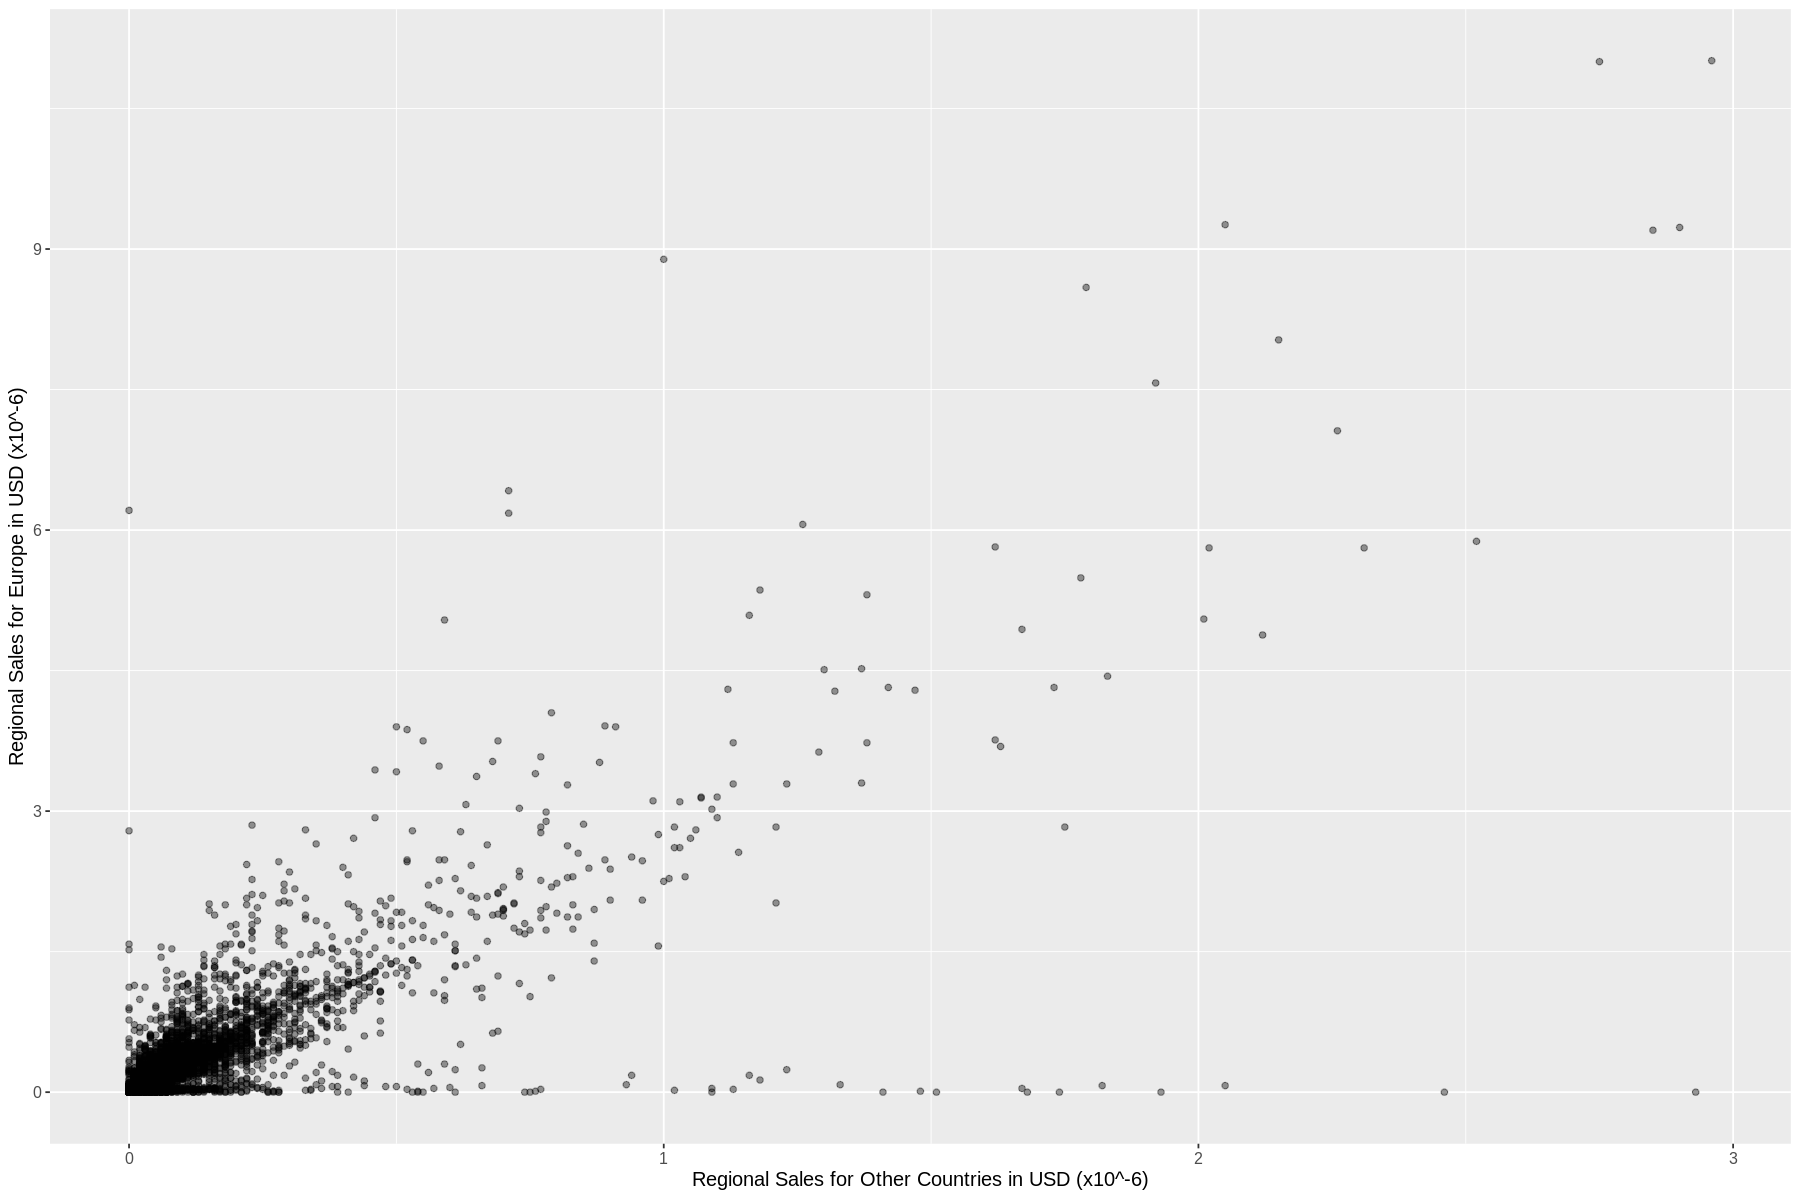

In [76]:
vg_no_outliers <- vg %>%
                filter(Other_Sales < 3.0) %>%
                filter(EU_Sales < 15)

plot_other_sales <- vg_no_outliers %>%
                    ggplot(aes (x = Other_Sales, y = EU_Sales)) +
                    geom_point(alpha = 0.4) +
                    labs(x = "Regional Sales for Other Countries in USD (x10^-6)", y = "Regional Sales for Europe in USD (x10^-6)") +
                    theme(text = element_text(size = 12))

plot_other_sales

<center><span style="color:gray">Figure 9. Scatterplot to depict correlation between EU_Sales and Other_Sales </span></center>

Based on Figure 9, we confirm that the correlation between `Other_Sales` and `EU_Sales` is present with a moderate strength. Therefore we decided to look into consider `Other_Sales` as a predictor. !!!30

In [77]:
#A cross validation is run to determine the best K value
vg_results <- vg_wkflw %>%  
tune_grid(resamples = vg_vfold, grid = gridvals) %>%  
collect_metrics() %>%  
filter(.metric == "rmse")%>%
filter(mean == min(mean)) %>%
select(neighbors)

vg_results

neighbors
<int>
3


In [78]:
#A model is created with best predictors and optimal K value

vg_spec_k <- nearest_neighbor(weight_func = "rectangular",
                    neighbors = 3) %>%  
set_engine("kknn") %>%  
set_mode("regression")


vg_fit <- workflow() %>%  
add_recipe(vg_recipe) %>%  
add_model(vg_spec_k) %>%
fit(data=vg_train)
                                 
vg_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~3, kernel = ~"rectangular")

Type of response variable: continuous
minimal mean absolute error: 0.06775229
Minimal mean squared error: 0.05807128
Best kernel: rectangular
Best k: 3

In [79]:
# #3D graph for interest
# library(lattice)
# dplot <- cloud(EU_Sales ~ NA_Sales * Other_Sales, data = vg_train_no_outlier, group = NULL, auto.key = TRUE)
# dplot
#<center><span style="color:gray">Figure 10. 3D depiction to depict correlation between EU_Sales and 2 predictors</span></center>

In [80]:
#Next, we evaluate how good the model is by making predictions on the test data
vg_summary <- vg_fit %>%  
predict(vg_test) %>%  
bind_cols(vg_test) %>%  
metrics(truth = EU_Sales, estimate = .pred) %>%  
filter(.metric == 'rmse')

#vg_summary

In [81]:
knn_test_results_onepredictor_updated <- vg_knn_regression %>%
    mutate(predictor = c("NA_Sales")) 

knn_test_results_twopredictors_updated <- vg_summary %>%
    mutate(predictor = c("NA_Sales, EU_Sales"))

knn_test_results_combined <- merge(knn_test_results_onepredictor_updated, knn_test_results_twopredictors_updated,all = TRUE)
knn_test_results_combined 

.metric,.estimator,.estimate,predictor
<chr>,<chr>,<dbl>,<chr>
rmse,standard,0.1950679,"NA_Sales, EU_Sales"
rmse,standard,0.2481428,NA_Sales


<span style="color:gray">Table 3. Comparative RMSPE results for case 1 and 2 in KNN-regression models to access the quality.

*Table 3* tells us that our RMSPE for the two-predictor KNN model is approximately 0.195 which is lower than the models that we have created thus far. This suggests that a KNN model with two predictors, namely `NA_Sales` and `Other_Sales`, would be the most suitable for predicting `EU_Sales`. !!!49

## 3. Discussion

**Summarize what you found** 
<br>​​Our research question was to predict the sales in the European market for a new action video game, given North America and other regional sales. We found that regional sales for North America and other regions best predict the action game sales for European countries. We tried both linear and KNN regression models and concluded that KNN regression is more suitable as it returned a lower RMSE value of 0.195 !!!71

**Is this what you expected to find?**
<br>There have been discussions surrounding the many differences in gaming preferences in North America and Europe (PlayerOne Contributor). When taking this into consideration, we did not expected our prediction model to accurately predict the success of a game in Europe based on its North American and “other” regional success. However, based on the correlation values between the regional sales found in our preliminary data analysis, we found that our model would likely be viable because of the moderate correlation between both sales in North America and Europe and sales in “other regions” and Europe.  !!!94



**What impact could such findings have?**
<br>Aforementioned, we expected our prediction model to perform poorly because of various factors impacting game sales. Matt Martin also pointed out that the European and American gamers are different and suggested that developers should reconsider their strategies to ensure success in North America. Conversely, our regression model suggests there is a correlation between European game sale and that of the North America’s. Hence, our model might help game publishers refine their promotion strategy especially in the European market by using the sales data from other regions. Also, the game publishers can use our model to predict whether their new action game will be successful or not in Europe. !!!108

**What future questions could this lead to?**
<br>In summary, we investigated the sales in different regions and use the regression model to predict European sales. Our model can predict how well a game may sell based on different regional sales for only action games. There are a few limitations in our project. First, we only look at action games, and we can expand the model to all game genres in the future. Second, we could scrape data from other websites to gain more observations for games published in recent years. Finally, we did not consider any additional categorical variables (e.g. gaming platforms and the publishers) as predictors in our regression model. One future direction is to test whether adding those variables improves our model. !!!117

## 4. References

*All references are formatted in MLA style.*

- Martin, Matt. “What European Developers Need to Know about American Online Gamers.” GamesIndustry.Biz, 13 Aug. 2012, www.gamesindustry.biz/articles/2012-08-13-what-european-developers-need-to-know-about-american-online-gamers.


- PlayerOne Contributor. “US vs. Europe: How the Gaming Industries Compare” Player.One, 25 Aug. 2021, https://www.player.one/us-vs-europe-how-gaming-industries-compare-142011.


- Timbers, Tiffany, et al. "Data Science: An Introduction" Datascience

- Gregory Smith.  Video Game Sales. Kaggle. 2022. Web. 10 Feb 2022. <https://www.kaggle.com/datasets/gregorut/videogamesales>